In [19]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,make_scorer,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split,GridSearchCV # Import train_test_split function

#for visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.utils import resample

import warnings
warnings.simplefilter('ignore')

from joblib import dump, load


In [3]:
df = pd.read_csv('clean_dataset.csv')
df.head()

,company_state_code,funding_total_usd,funding_rounds,total_investors,funding_duration,pseudoEstd,angel,convertible_note,debt_financing,equity_crowdfunding,...,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50
0,8,5.845098,2,0.0,7.0,649.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15,7.316785,1,1.0,0.0,654.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,7.526339,4,14.0,34.0,636.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,6.060717,3,13.0,30.0,618.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,6.957633,1,0.0,0.0,639.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
labels = df['success'].astype(int)
features = df.drop(['success'],axis=1)
features

,company_state_code,funding_total_usd,funding_rounds,total_investors,funding_duration,pseudoEstd,angel,convertible_note,debt_financing,equity_crowdfunding,...,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50
0,8,5.845098,2,0.0,7.0,649.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15,7.316785,1,1.0,0.0,654.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,7.526339,4,14.0,34.0,636.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,6.060717,3,13.0,30.0,618.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,6.957633,1,0.0,0.0,639.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9,6.957633,1,0.0,0.0,648.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4,7.114991,1,2.0,0.0,607.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,32,6.243038,1,0.0,0.0,613.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,35,6.778151,1,0.0,0.0,661.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4,6.698970,1,1.0,0.0,662.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=1)

In [7]:
labels.value_counts()

0    32336
1     5265
Name: success, dtype: int64

In [9]:
from sklearn.utils import shuffle

y_train0 = y_train[y_train==0]
y_train1 = y_train[y_train==1]

# upsample minority
y_train1_upsampled, X_train_upsampled = resample(y_train1.values, X_train[y_train==1],
                                  replace=True, n_samples = len(y_train0), random_state=6)


# #combine majority and upsampled minority
xTrain = pd.concat([X_train_upsampled, X_train[y_train==0]])
yTrain = np.concatenate((y_train1_upsampled, y_train0))
xTrain, yTrain = shuffle(xTrain, yTrain)
# check new class counts
print(xTrain.shape)
print(yTrain.shape)


(51672, 77)
(51672,)


In [15]:
from sklearn.preprocessing import MinMaxScaler
#normalization of continuous data
scaler = MinMaxScaler()
normalizedXTrain = scaler.fit_transform(xTrain)
normalizedXTest = scaler.transform(X_test)
print(normalizedXTrain)

[[0.32075472 0.60889926 0.11764706 ... 0.         0.         0.        ]
 [0.67924528 0.7046968  0.11764706 ... 1.         0.         0.        ]
 [0.39622642 0.7159986  0.05882353 ... 0.         0.         0.        ]
 ...
 [0.09433962 0.49398335 0.         ... 0.         0.         0.        ]
 [0.         0.66400583 0.         ... 0.         0.         0.        ]
 [0.94339623 0.66400583 0.         ... 0.         0.         0.        ]]


### Logistic Regression

In [21]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
result = logreg.fit(normalizedXTrain, yTrain)
y_pred = logreg.predict(normalizedXTest)
# Print the prediction accuracy
acc=metrics.accuracy_score(y_test, y_pred)
print (metrics.accuracy_score(y_test, y_pred))
cnf_matrix =confusion_matrix(y_test, y_pred)
print(cnf_matrix)


0.7495013960909453
[[4886 1614]
 [ 270  751]]


In [22]:
print('Classification Report for  Logistic Regression')
print(classification_report(y_test, y_pred))

Classification Report for  Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      6500
           1       0.32      0.74      0.44      1021

    accuracy                           0.75      7521
   macro avg       0.63      0.74      0.64      7521
weighted avg       0.86      0.75      0.78      7521



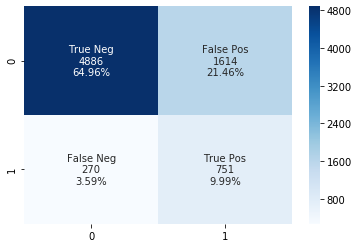

In [30]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

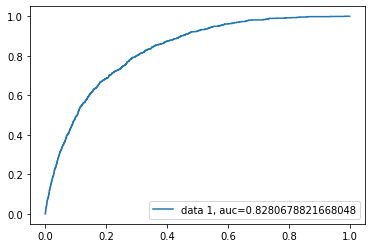

In [26]:
y_pred_proba = logreg.predict_proba(normalizedXTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVM 

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
# fit model
svm.fit(normalizedXTrain, yTrain)
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  #decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  #max_iter=-1, probability=True, random_state=42, shrinking=True,
  #tol=0.001, verbose=False)
y_pred = svm.predict(normalizedXTest)
print (metrics.accuracy_score(y_test, y_pred))
cnf_matrix=confusion_matrix(y_test, y_pred)
print(cnf_matrix)

0.7596064353144528
[[4953 1547]
 [ 261  760]]


In [32]:
print('Classification Report for SVC')
print(classification_report(y_test, y_pred))

Classification Report for SVC
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      6500
           1       0.33      0.74      0.46      1021

    accuracy                           0.76      7521
   macro avg       0.64      0.75      0.65      7521
weighted avg       0.87      0.76      0.79      7521



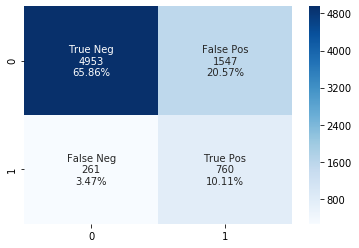

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

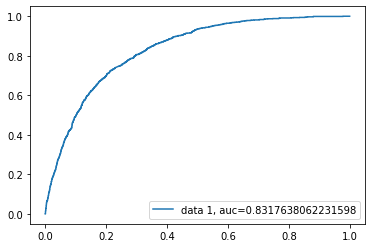

In [35]:
y_pred_proba = svm.predict_proba(normalizedXTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(normalizedXTrain, yTrain)
y_pred = model.predict(normalizedXTest)
# Print the prediction accuracy
acc=metrics.accuracy_score(y_test, y_pred)
print (metrics.accuracy_score(y_test, y_pred))
cnf_matrix= confusion_matrix(y_test, y_pred)
print(cnf_matrix)


0.7495013960909453
[[4886 1614]
 [ 270  751]]


In [37]:
print('Classification Report for  KNeighbors Classifier')
print(classification_report(y_test, y_pred))

Classification Report for  KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      6500
           1       0.32      0.74      0.44      1021

    accuracy                           0.75      7521
   macro avg       0.63      0.74      0.64      7521
weighted avg       0.86      0.75      0.78      7521



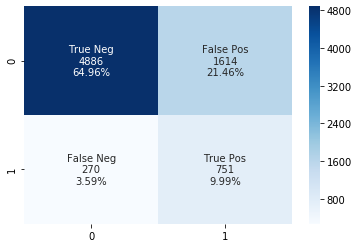

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

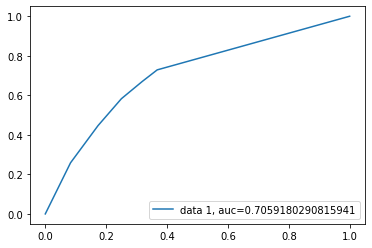

In [52]:
y_pred_proba = knn.predict_proba(normalizedXTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()